Source: https://www.learnpytorch.io/01_pytorch_workflow/

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias

x, y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

In [3]:
train_split = int(0.8*len(x)) # 80% of training set and 20% of training set
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(x_test)


(40, 10)

In [4]:
def plot_predictions(train_data=x_train,
                    train_labels=y_train,
                    test_data=x_test,
                    test_labels=y_test,
                    predictions=None):
    
    
    plt.figure(figsize=(10,7));
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size":14});

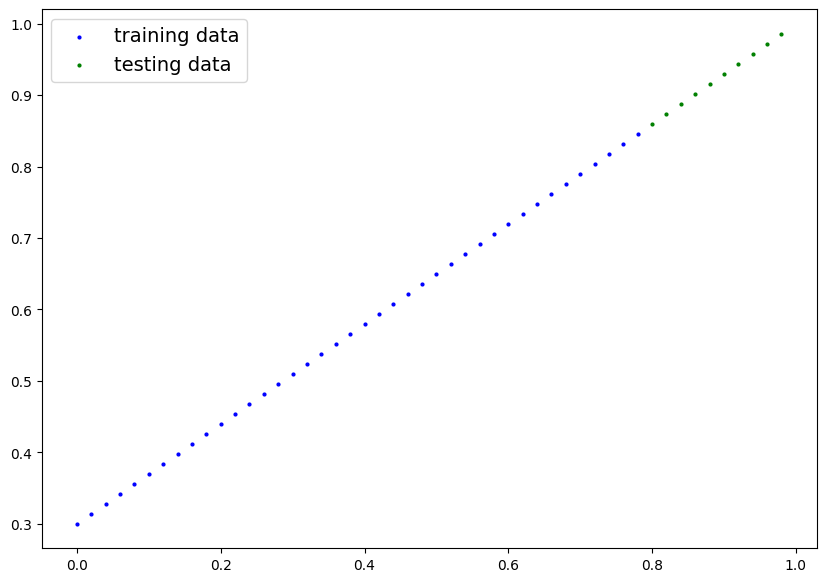

In [5]:
plot_predictions()

# Build model

In [6]:
torch.randn(1,dtype=torch.float,requires_grad=True)

tensor([-1.3551], requires_grad=True)

In [7]:
# Create a Linear Regression Model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                               dtype=torch.float),
                                   requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,
                                           dtype=torch.float),
                                 requires_grad=True)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

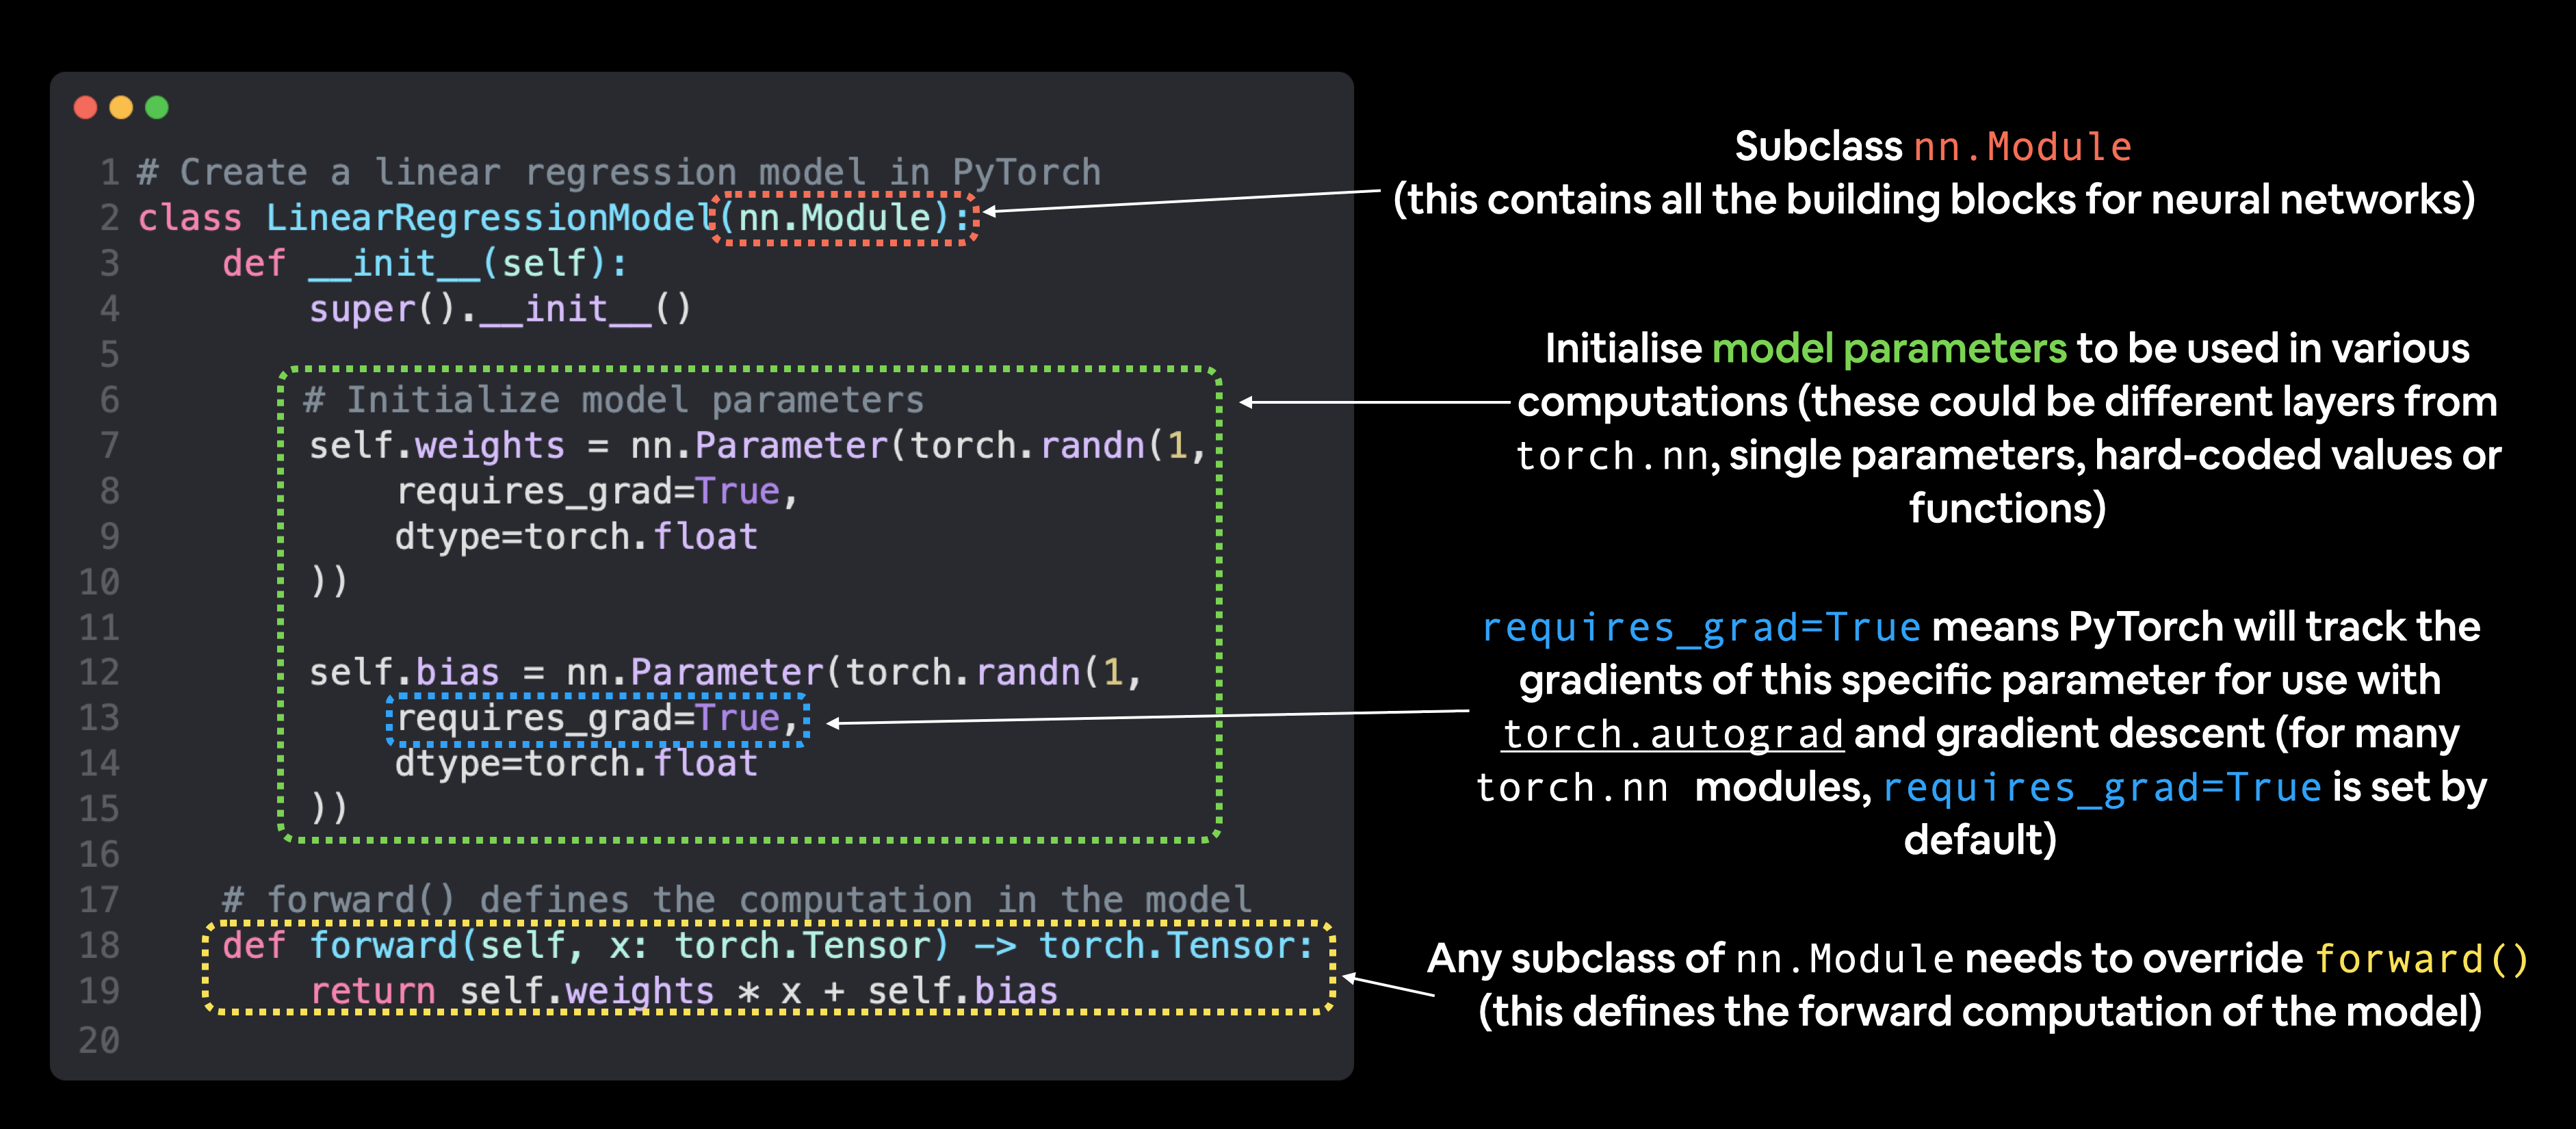

In [8]:
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([-0.9722], requires_grad=True),
 Parameter containing:
 tensor([-1.9432], requires_grad=True)]

In [9]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([-0.9722])), ('bias', tensor([-1.9432]))])

## Making predictions

Making predictions using torch.inference_mode()
To check this we can pass it the test data `x_test` to see how closely it predicts `y_test`.

When we pass data to our model, it'll go through the model's forward() method and produce a result using the computation we've define.

In [10]:
with torch.inference_mode():
    y_preds = model_0(x_test)

In [11]:
# Check th predictions
print(f"Number of testing samples: {len(x_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[-2.7210],
        [-2.7404],
        [-2.7599],
        [-2.7793],
        [-2.7988],
        [-2.8182],
        [-2.8376],
        [-2.8571],
        [-2.8765],
        [-2.8960]])


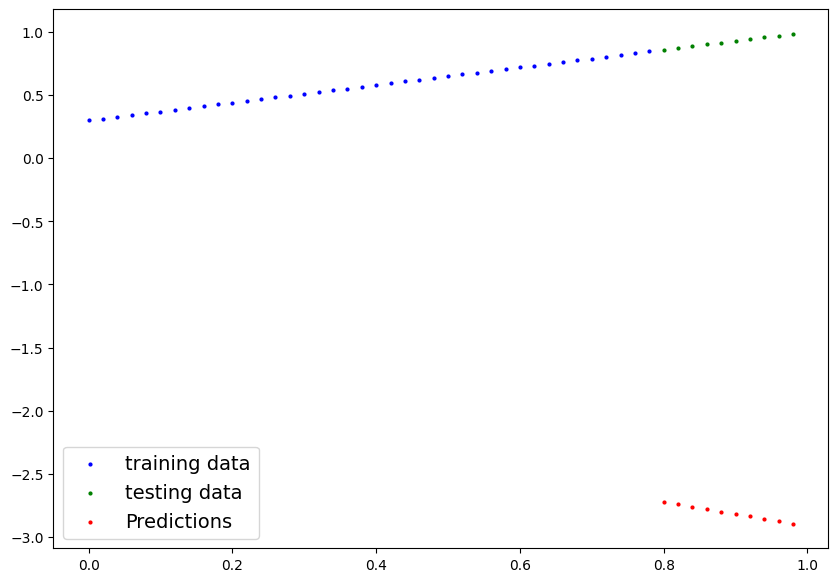

In [12]:
plot_predictions(predictions=y_preds)

# Train model

## Loss function and optimizer

Loss function - Measures how wrong your models predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test). Lower the better.	

PyTorch has plenty of built-in loss functions in torch.nn.	

Mean absolute error (MAE) for regression problems (torch.nn.L1Loss()). Binary cross entropy for binary classification problems (torch.nn.BCELoss()).

==================

Optimizer - Tells your model how to update its internal parameters to best lower the loss. 

You can find various optimization function implementations in torch.optim.	

Stochastic gradient descent (torch.optim.SGD()). Adam optimizer (torch.optim.Adam()).

In [13]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss i the same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                           lr=0.01) # learning rate (how much the optimizer should change parameter)

## PyTorch Training Loop


1	Forward pass - The model goes through all of the training data once, performing its forward() function calculations. 

    model(x_train)

2	Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.
    
    loss = loss_fn(y_pred, y_train)

3	Zero gradients	The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step.	
    
    optimizer.zero_grad()

4	Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards".
    
    loss_backward()

5	Update the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them.	
    
    optimizer.step()

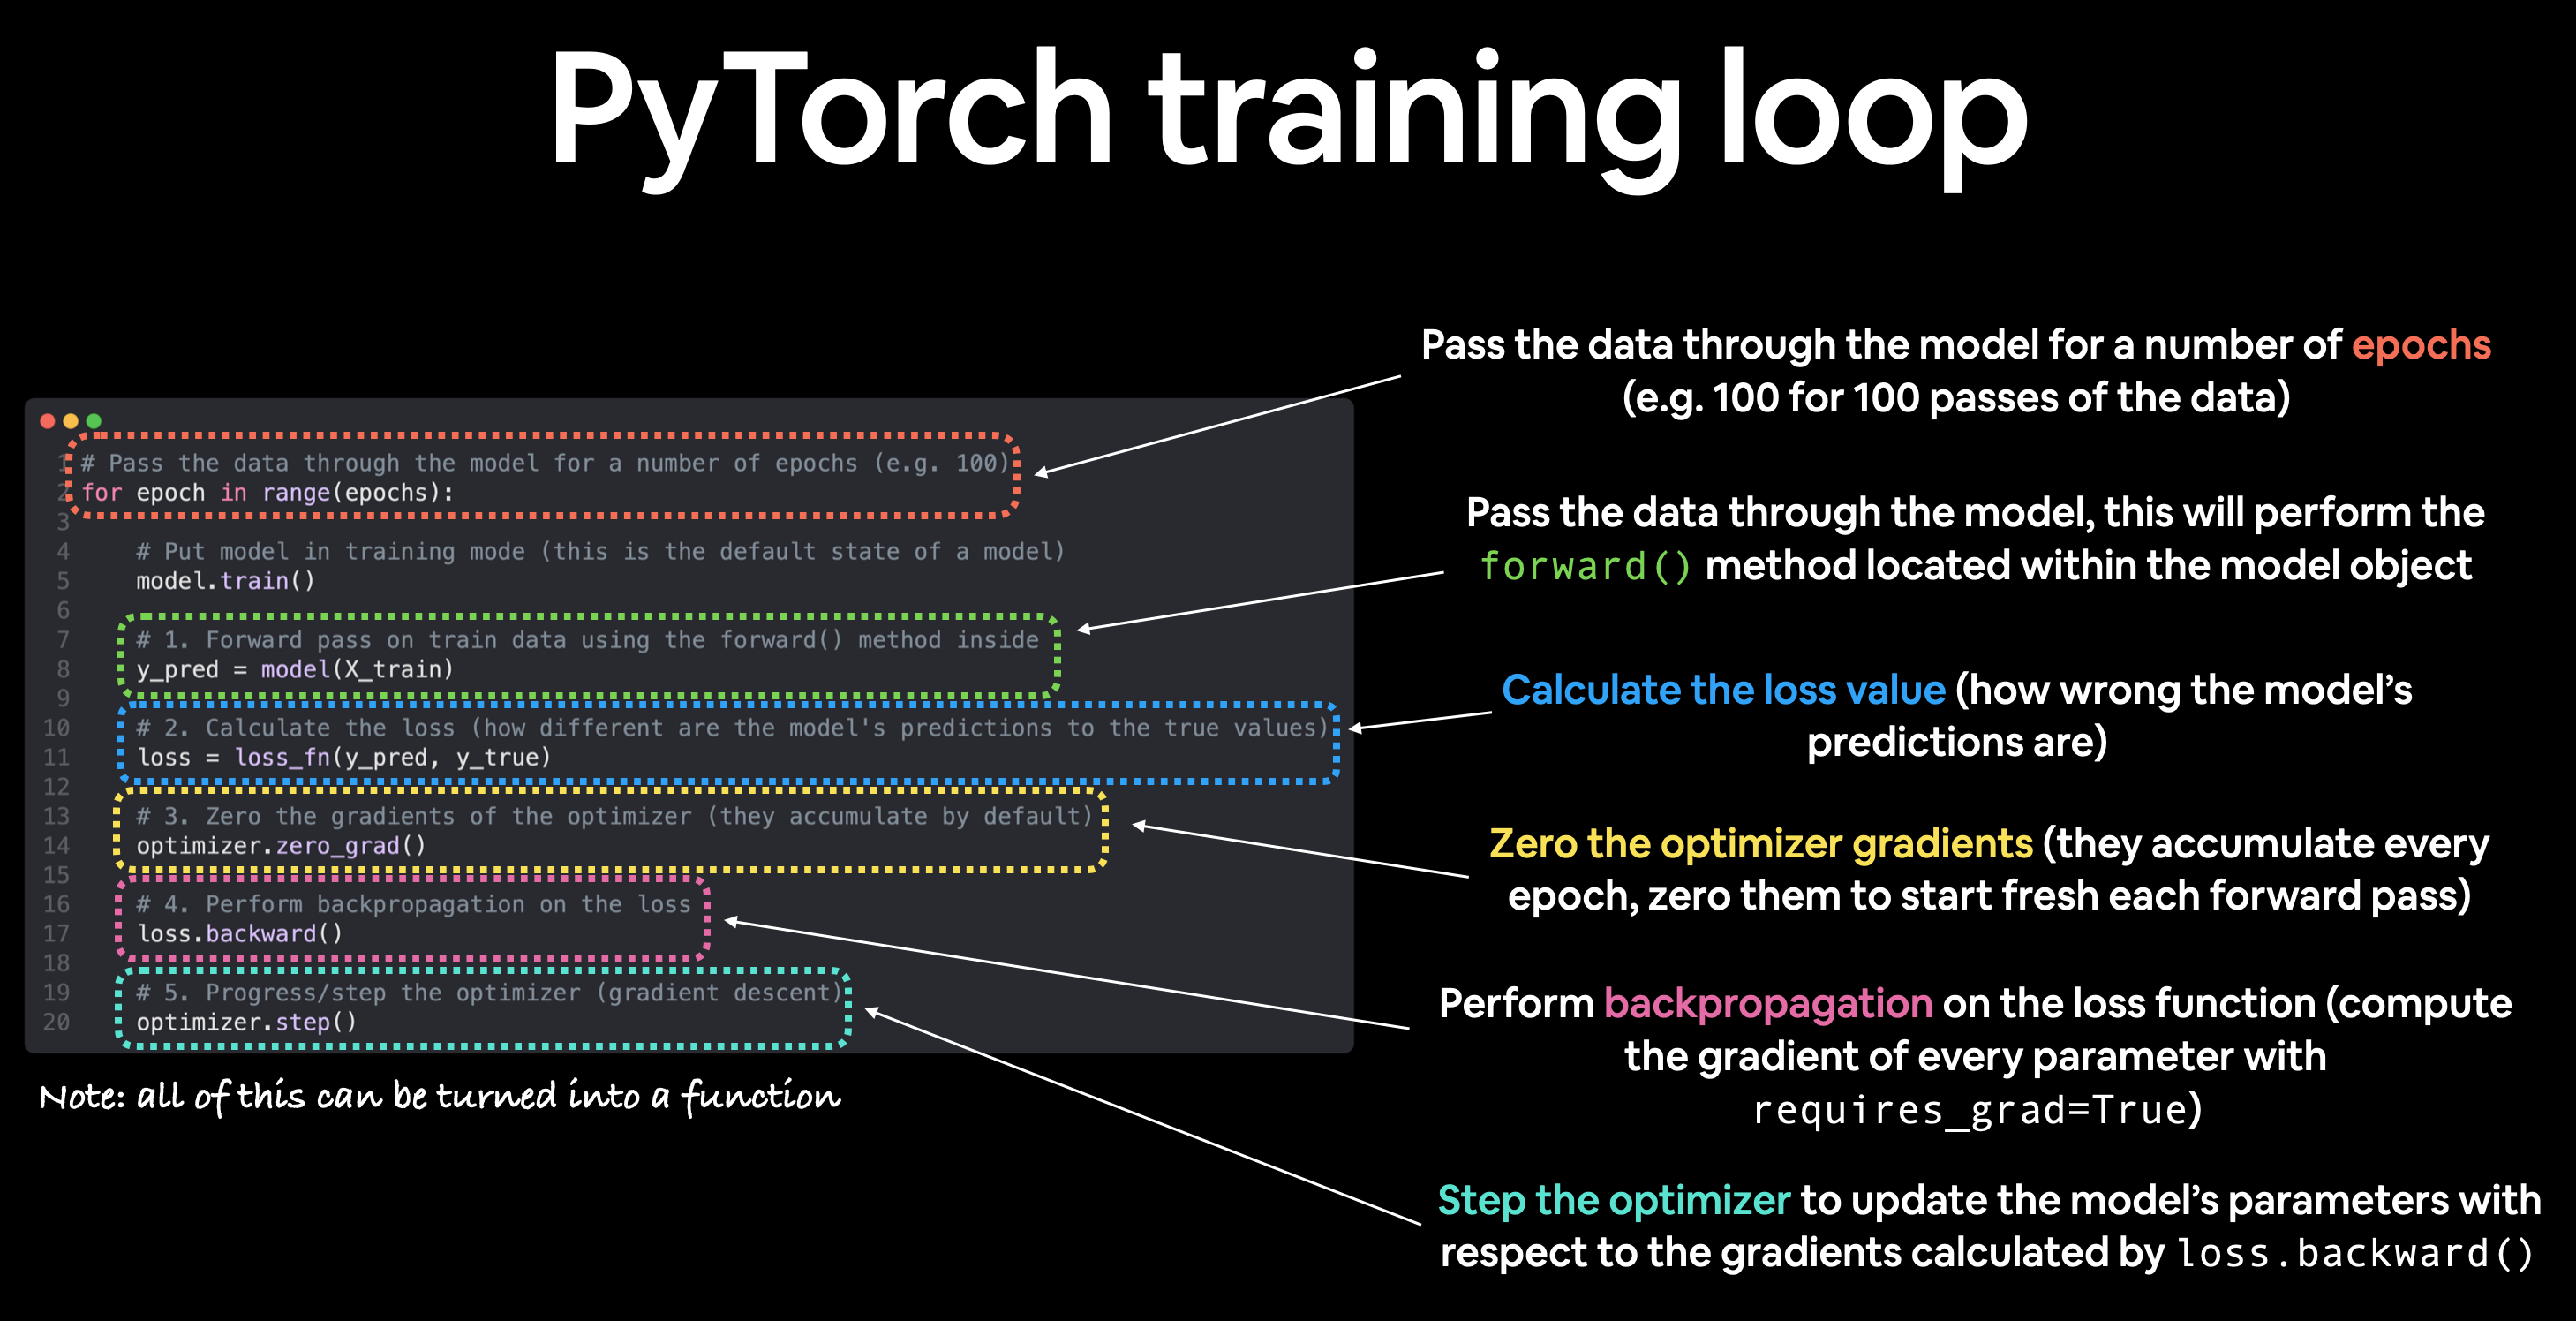

In [28]:
torch.manual_seed(42)

# Number of epochs = how many times the model will pass over the training data
epochs=300

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### TRAINING ###
    # Put model in traing mode ( this is the default state of a model
    model_0.train()
    
    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(x_train)
    # print(y_pred)
    
    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)
    
    # 3. Zero grad of the optimizer
    optimizer.zero_grad()
    
    # 4. Loss backwards
    loss.backward()
    
    # 5. Progress the optimizer
    optimizer.step()
    
    ### TESTING ###
    
    # Put thee model in evaluation mode
    model_0.eval()
    
    with torch.inference_mode():
        # 1. Forward pass on test data
        test_pred = model_0(x_test)
        
        # 2. Calculate loss on test data
        test_loss = loss_fn(test_pred, y_test)
        
        # Print out what's happening
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.047434769570827484 | MAE Test Loss: 0.11027409136295319
Epoch: 10 | MAE Train Loss: 0.04399953782558441 | MAE Test Loss: 0.10200156271457672
Epoch: 20 | MAE Train Loss: 0.04056128114461899 | MAE Test Loss: 0.09441588819026947
Epoch: 30 | MAE Train Loss: 0.03713284432888031 | MAE Test Loss: 0.0861433818936348
Epoch: 40 | MAE Train Loss: 0.03369591012597084 | MAE Test Loss: 0.07787083089351654
Epoch: 50 | MAE Train Loss: 0.030259352177381516 | MAE Test Loss: 0.07028516381978989
Epoch: 60 | MAE Train Loss: 0.026830917224287987 | MAE Test Loss: 0.06201264262199402
Epoch: 70 | MAE Train Loss: 0.023392297327518463 | MAE Test Loss: 0.05374009534716606
Epoch: 80 | MAE Train Loss: 0.019957419484853745 | MAE Test Loss: 0.0461544394493103
Epoch: 90 | MAE Train Loss: 0.016527479514479637 | MAE Test Loss: 0.03788188099861145
Epoch: 100 | MAE Train Loss: 0.013088676147162914 | MAE Test Loss: 0.02960936352610588
Epoch: 110 | MAE Train Loss: 0.009655490517616272 | MAE Test

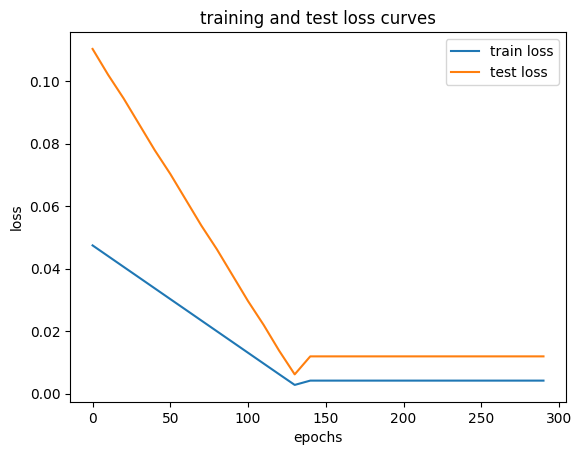

In [32]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="train loss")
plt.plot(epoch_count, test_loss_values, label="test loss")
plt.title("training and test loss curves")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend();

In [34]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6947])), ('bias', tensor([0.3063]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


# Making predictions with a trained PyTorch model

In [35]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
    
# 3. Make sure the calculations are done with the model and data on the same device
# in our case, we haven't setup device-agnostic code yet so our data nd model are
# on the CPU by default.
# model_0.to(device)
# x_test = x_test.to(device)
    y_preds = model_0(x_test)
y_preds

tensor([[0.8620],
        [0.8759],
        [0.8898],
        [0.9037],
        [0.9176],
        [0.9315],
        [0.9454],
        [0.9593],
        [0.9732],
        [0.9870]])

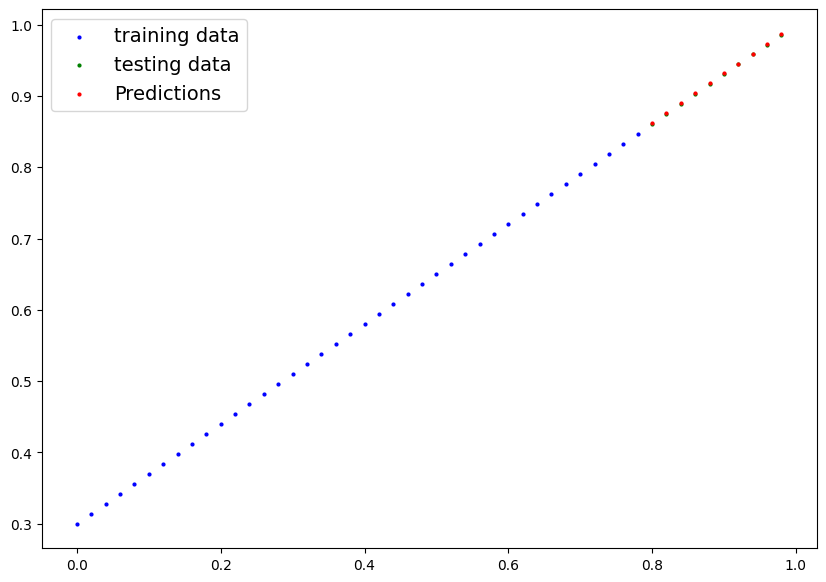

In [36]:
plot_predictions(predictions=y_preds)